# Assignment 2 - [Samarth Neerkaje Saralaya]_[a195040]



# Preprocessing

In [19]:
import sys
sys.executable

'c:\\Users\\samar\\Diabetes_prediction\\DLF_Assignment_2\\DLF_Assignment_2\\venv\\Scripts\\python.exe'

In [20]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!{sys.executable} -m pip install seaborn scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import sys
!{sys.executable} -m pip install torch --index-url https://download.pytorch.org/whl/cu129

Looking in indexes: https://download.pytorch.org/whl/cu129



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [134]:
import pandas as pd

train_df = pd.read_csv('./data/train_data.csv')
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0


In [135]:
train_df.info()
#train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
 8   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.3 KB


In [136]:
train_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.809446,120.465798,68.903909,20.456026,81.250814,31.929642,0.468096,33.265472,0.342020
std,3.375544,31.959619,19.933385,16.063105,116.947384,8.136791,0.329203,11.851427,0.474773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.238000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,27.000000,32.150000,0.365500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,130.000000,36.500000,0.628500,41.000000,1.000000
max,15.000000,197.000000,114.000000,99.000000,744.000000,67.100000,2.420000,72.000000,1.000000


In [ ]:
import pandas as pd

Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1

# Define outliers: anything outside Q1 - 1.5*IQR, Q3 + 1.5*IQR
outliers = ((train_df < (Q1 - 1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR)))
df_outliers = train_df[outliers.any(axis=1)]

print(f"Total outlier rows: {df_outliers.shape[0]}")
df_outliers.head()

Total outlier rows: 103


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,0,117,0,0,0,33.8,0.932,44,0
18,4,183,0,0,0,28.4,0.212,36,1
30,0,162,76,56,100,53.2,0.759,25,1
31,4,146,78,0,0,38.5,0.520,67,1
33,0,167,0,0,0,32.3,0.839,30,1


In [138]:
print(outliers.sum())

Pregnancies                  2
Glucose                      4
BloodPressure               40
SkinThickness                1
Insulin                     26
BMI                         19
DiabetesPedigreeFunction    21
Age                          7
Outcome                      0
dtype: int64


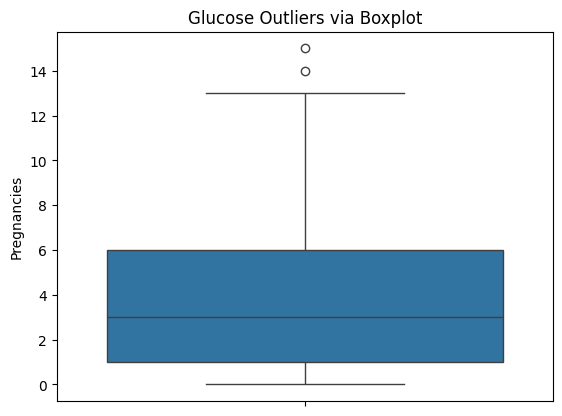

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=train_df['Pregnancies'])
plt.title("Glucose Outliers via Boxplot")
plt.show()

In [140]:
#Drop outlier rows
train_df_cleaned = train_df[~outliers.any(axis=1)]
train_df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               511 non-null    int64  
 1   Glucose                   511 non-null    int64  
 2   BloodPressure             511 non-null    int64  
 3   SkinThickness             511 non-null    int64  
 4   Insulin                   511 non-null    int64  
 5   BMI                       511 non-null    float64
 6   DiabetesPedigreeFunction  511 non-null    float64
 7   Age                       511 non-null    int64  
 8   Outcome                   511 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 39.9 KB


In [ ]:
print(f"Original data shape: {train_df.shape}")
print(f"Cleaned data shape: {train_df_cleaned.shape}")

Original data shape: (614, 9)
Cleaned data shape: (511, 9)


In [142]:
#Use standard scaling to scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_df_features = train_df_cleaned.drop('Outcome', axis=1)
scaled_features = scaler.fit_transform(train_df_features)
train_df_scaled = pd.DataFrame(scaled_features, columns=train_df_features.columns)
train_df_scaled['Outcome'] = train_df_cleaned['Outcome'].values
train_df_scaled.head()






,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.664999,-0.725292,-1.272398,0.814304,1.475834,0.318375,0.000207,0.902684,0
1,-0.538950,-0.246891,0.239684,0.748970,-0.823112,0.586242,-1.103091,-1.051480,0
2,-0.538950,-0.383577,-0.738722,-1.341702,-0.823112,-0.185845,-1.063967,-1.051480,0
3,1.266973,-0.417748,0.684414,-1.341702,-0.823112,-1.162770,1.666890,0.103253,0
4,0.965986,0.573226,1.573875,-1.341702,-0.823112,-0.327656,-0.860522,1.524464,0


In [143]:
test_df = pd.read_csv('./data/test_data.csv')
test_df_features = test_df.drop('Outcome', axis=1)
scaled_test_features = scaler.transform(test_df_features)
test_df_scaled = pd.DataFrame(scaled_test_features, columns=test_df_features.columns)
test_df_scaled['Outcome'] = test_df['Outcome'].values
test_df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.839937,-1.169522,-0.560830,0.552970,-0.823112,-0.847633,-0.308873,-0.163224,0
1,-1.140924,0.607397,-2.873427,0.944971,1.209640,1.752249,7.269450,0.014428,1
2,-0.839937,2.384316,-1.094506,0.160968,9.413246,-0.296143,-0.124990,2.323895,1
3,0.364012,1.598371,-0.027154,-0.100366,1.294338,-0.973688,0.614454,1.613290,1
4,-0.237962,0.231510,1.395983,1.336972,2.020321,1.153488,1.072205,-0.518526,0


In [144]:
import numpy as np

for col, mean, std in zip(train_df_features.columns,
                          scaler.mean_,
                          scaler.scale_):
    min_train, max_train = train_df[col].min(), train_df[col].max()
    min_test, max_test = test_df[col].min(), test_df[col].max()
    print(f"{col:15s} train μ={mean:.2f}, σ={std:.2f}, "
          f"test range=({min_test:.2f}, {max_test:.2f}), "
          f" train range=({min_train:.2f}, {max_train:.2f})")


Pregnancies     train μ=3.79, σ=3.32, test range=(0.00, 17.00),  train range=(0.00, 15.00)
Glucose         train μ=119.23, σ=29.26, test range=(0.00, 199.00),  train range=(0.00, 197.00)
BloodPressure   train μ=72.31, σ=11.24, test range=(0.00, 122.00),  train range=(0.00, 114.00)
SkinThickness   train μ=20.54, σ=15.31, test range=(0.00, 51.00),  train range=(0.00, 99.00)
Insulin         train μ=68.03, σ=82.65, test range=(0.00, 846.00),  train range=(0.00, 744.00)
BMI             train μ=31.98, σ=6.35, test range=(18.20, 49.70),  train range=(0.00, 67.10)
DiabetesPedigreeFunction train μ=0.43, σ=0.26, test range=(0.12, 2.29),  train range=(0.08, 2.42)
Age             train μ=32.84, σ=11.26, test range=(21.00, 81.00),  train range=(21.00, 72.00)


In [145]:
#Dataset and DataLoader for PyTorch
import torch
from torch.utils.data import Dataset, DataLoader
class DiabetesDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.X = dataframe.drop('Outcome', axis=1).values.astype(np.float32)
        self.y = dataframe['Outcome'].values.astype(np.float32)
        self.transform = transform
    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        if self.transform:
            self.X[idx] = self.transform(self.X[idx])
        return self.X[idx], self.y[idx]
    


In [146]:
train_dataset = DiabetesDataset(train_df_scaled)
test_dataset = DiabetesDataset(test_df_scaled)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Model Implementation

In [ ]:
import torch.nn as nn

#model definition
class Model_a2(nn.Module):
    def __init__(self, activation_fn='relu', input_features=8, dropout_prob=0.2):
        """
        activation_fn = relu/gelu/leaky_relu
        """
        super(Model_a2, self).__init__()
        self.fc1 = nn.Linear(input_features, 16)
        self.fc2  = nn.Linear(16, 10)
        self.fc3  = nn.Linear(10, 5)
        self.fc4  = nn.Linear(5, 2)
        if activation_fn == 'relu':
            self.activation_fn = nn.ReLU()
        elif activation_fn == 'gelu':
            self.activation_fn = nn.GELU()
        elif activation_fn == 'leaky_relu':
            self.activation_fn = nn.LeakyReLU()

        self.dropout = nn.Dropout(dropout_prob)
        #self.sigmoid = nn.Sigmoid()

        
    def forward(self, x):
        x = self.dropout(self.activation_fn(self.fc1(x)))
        x = self.dropout(self.activation_fn(self.fc2(x)))
        x = self.dropout(self.activation_fn(self.fc3(x)))
        x = self.fc4(x)
        return x


In [ ]:
from sklearn.model_selection import StratifiedKFold
from torch.utils.data import Subset
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

class ModelUtility:
    def __init__(self, config, train_ds, test_ds):
        """
        config: dict
        {
            batch_size : Integer,
            learning_rate : Integer,
            device : String,
            optimizer : String,
            num_epochs : Integer
        }
        """
        self.config = config
        self.train_dataset = train_ds
        self.test_dataset = test_ds
        self.train_loader = DataLoader(self.train_dataset, batch_size=16, shuffle=True)
        self.test_loader = DataLoader(self.test_dataset, batch_size=16, shuffle=False)

    def fold_loaders(self, target_df):

        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        print(f"self.train_dataset.__len__():{self.train_dataset.__len__()}, target_df_shape:{target_df.shape}")

        for  fold_id, (train_index, val_index) in enumerate(skf.split(np.zeros(self.train_dataset.__len__()), target_df), start=1):

            assert set(train_index).isdisjoint(set(val_index))

            train_ds = Subset(train_dataset, train_index)
            val_ds = Subset(train_dataset, val_index)

            train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
            val_loader = DataLoader(val_ds, batch_size=16, shuffle=False)

            yield fold_id, train_loader, val_loader, train_index, val_index
    
    def kfold_fit(self, model_ctor, target_df, K=5, activation_fn='relu'):

        val_losses, val_accs = [], []
        best_fold_states = []
        all_hist = []

        for fold_id, tr_ldr, va_ldr, tr_idx, va_idx in self.fold_loaders(target_df):

            model = model_ctor(activation_fn)            # fresh model per fold
            model, history = self.fit(model, tr_ldr, va_ldr)

            # evaluate on validation for this fold
            crit = nn.CrossEntropyLoss()
            val_loss, val_acc = self.evaluate(model, va_ldr, crit)
            val_losses.append(val_loss); val_accs.append(val_acc)

            # keep the state dict to ensemble or later pick the best fold
            best_fold_states.append({k: v.cpu().clone() for k, v in model.state_dict().items()})
            print(f"[Fold {fold_id}/{K}] val_loss={val_loss:.4f}  val_acc={val_acc:.4f}")
            all_hist.append(history)

        print(f"\nK-fold summary ({K} folds): val_loss={sum(val_losses)/K:.4f}±{torch.tensor(val_losses).std().item():.4f}  "
            f"val_acc={sum(val_accs)/K:.4f}±{torch.tensor(val_accs).std().item():.4f}")
        
        #Plotting training history for each fold
        self.plot_histories(all_hist)

        return val_losses, val_accs, best_fold_states
    
    def make_optimizer(self, params):
        if self.config['optimizer'] == "SGD":
            return torch.optim.SGD(params, lr=self.config['learning_rate'], momentum=0.9, nesterov=True)
        elif self.config['optimizer'] == "Adam":
            return torch.optim.Adam(params, lr=self.config['learning_rate'])
        elif self.config['optimizer'] == "AdamW":
            return torch.optim.AdamW(params, lr=self.config['learning_rate'],weight_decay=1e-3,betas=(0.9, 0.99))
        else:
            raise ValueError(f"Unknown optimizer in config")

    def train_one_epoch(self, model, train_loader):
        model.to(self.config['device'])
        criterion = nn.CrossEntropyLoss()
        optimizer = self.make_optimizer(model.parameters())
        running_loss, correct, total = 0.0, 0, 0

        model.train()

        for X,y in train_loader:
            X, y = X.to(self.config['device']), y.to(self.config['device']).long()
            
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * X.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)
        return running_loss / total, correct / total

    @torch.no_grad()
    def evaluate(self, model, loader=None, criterion=None, test=False):
        if not loader:
            loader = self.test_loader
            
        model.eval()
        running_loss, correct, total = 0.0, 0, 0
        y_true, y_score, y_preds= [], [], []
        for x, y in loader:
            x, y = x.to(self.config['device']), y.to(self.config['device']).long()
            logits = model(x)
            loss = criterion(logits, y)
            running_loss += loss.item() * x.size(0)
            preds = logits.argmax(dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)

            if test:
                probs = torch.softmax(logits, dim=1)[:, 1].cpu().numpy()
                y_score.extend(probs)
                y_preds.extend(preds.cpu().numpy())
                y_true.extend(y.cpu().numpy())
        if test:
            self.visualize(y_true, y_score, y_preds)
        
        return running_loss / total, correct / total

    def fit(self, model, train_loader=None, val_loader=None, test=False):
        if not train_loader:
            train_loader = self.train_loader
            
        model.to(self.config['device'])
        criterion = nn.CrossEntropyLoss()

        best_val_acc = 0.0
        best_state = None

        history = {
            "train_loss": [], "val_loss": [],
            "train_acc":  [], "val_acc":  []
        }

        for epoch in range(1, self.config['num_epochs'] + 1):
            tr_loss, tr_acc = self.train_one_epoch(model, train_loader)
            val_loss, val_acc = self.evaluate(model, val_loader, criterion) if val_loader else (None, None)

            print(f"Epoch {epoch:02d} | train_loss={tr_loss:.4f} acc={tr_acc:.4f}"
                + (f" | val_loss={val_loss:.4f} acc={val_acc:.4f}" if val_loader else ""))
            
            history["train_loss"].append(tr_loss)
            history["train_acc"].append(tr_acc)
            history["val_loss"].append(val_loss)
            history["val_acc"].append(val_acc)

            # model selection based on validation
            if val_loader and val_acc > best_val_acc:
                best_val_acc = val_acc
                best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}

        # Load best model (if we used a validation set)
        if val_loader and best_state is not None:
            model.load_state_dict(best_state)

        # Final test only once
        if test:
            test_loss, test_acc = self.evaluate(model, self.test_loader, criterion)
            print(f"TEST | loss={test_loss:.4f} acc={test_acc:.4f}")

        return model, history

    # Plotting function for training histories
    def plot_histories(self, all_hist):
        def nanmean(lst):
            arr = np.array([x for x in lst if x is not None], dtype=float)
            return float(arr.mean()) if arr.size else None

        mean_train_loss = np.mean([h["train_loss"] for h in all_hist], axis=0)
        mean_train_acc  = np.mean([h["train_acc"]  for h in all_hist], axis=0)

    # for validation (may exist), average only non-None entries per epoch:
        mean_val_loss = [nanmean([h["val_loss"][e] for h in all_hist]) for e in range(len(all_hist[0]["val_loss"]))]
        mean_val_acc  = [nanmean([h["val_acc"][e]  for h in all_hist]) for e in range(len(all_hist[0]["val_acc"]))]


        epochs = range(1, len(mean_train_loss) + 1)

        # Loss
        plt.figure()
        plt.plot(epochs, mean_train_loss, label="Train")
        if mean_val_loss[0] is not None:
            plt.plot(epochs, mean_val_loss, label="Val")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Loss per Epoch")
        plt.legend()
        plt.show()

        # Accuracy
        plt.figure()
        plt.plot(epochs, mean_train_acc, label="Train")
        if mean_val_acc[0] is not None:
            plt.plot(epochs, mean_val_acc, label="Val")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.title("Accuracy per Epoch")
        plt.legend()
        plt.show()

    def visualize(self, y_true, y_score, preds=None):
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6,6))
        plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver Operating Characteristic (ROC) Curve")
        plt.legend()
        plt.show()


        cm = confusion_matrix(y_true, preds)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
        disp.plot()
        plt.show()


        

    

# Experiments

===============Hyperparameter: config_1: {'batch_size': 16, 'device': 'cuda', 'optimizer': 'SGD', 'num_epochs': 10, 'learning_rate': 0.001, 'activation_fn': 'relu'}===============
self.train_dataset.__len__():511, target_df_shape:(511,)
Epoch 01 | train_loss=0.6406 acc=0.6912 | val_loss=0.6399 acc=0.6893
Epoch 02 | train_loss=0.6357 acc=0.6912 | val_loss=0.6351 acc=0.6893
Epoch 03 | train_loss=0.6306 acc=0.6912 | val_loss=0.6312 acc=0.6893
Epoch 04 | train_loss=0.6298 acc=0.6912 | val_loss=0.6277 acc=0.6893
Epoch 05 | train_loss=0.6270 acc=0.6912 | val_loss=0.6249 acc=0.6893
Epoch 06 | train_loss=0.6204 acc=0.6912 | val_loss=0.6227 acc=0.6893
Epoch 07 | train_loss=0.6194 acc=0.6912 | val_loss=0.6211 acc=0.6893
Epoch 08 | train_loss=0.6169 acc=0.6912 | val_loss=0.6194 acc=0.6893
Epoch 09 | train_loss=0.6182 acc=0.6912 | val_loss=0.6183 acc=0.6893
Epoch 10 | train_loss=0.6180 acc=0.6912 | val_loss=0.6176 acc=0.6893
[Fold 1/5] val_loss=0.6399  val_acc=0.6893
Epoch 01 | train_loss=0.8096 a

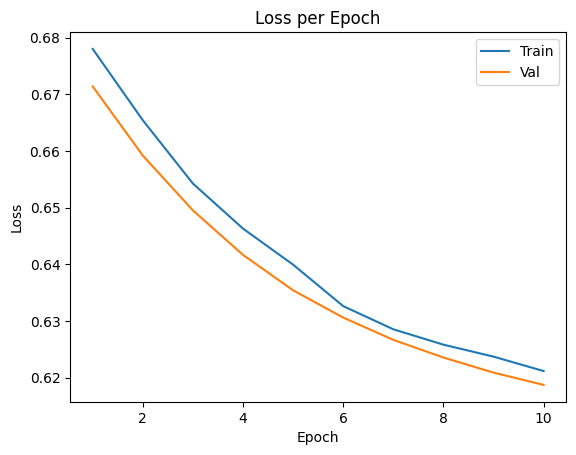

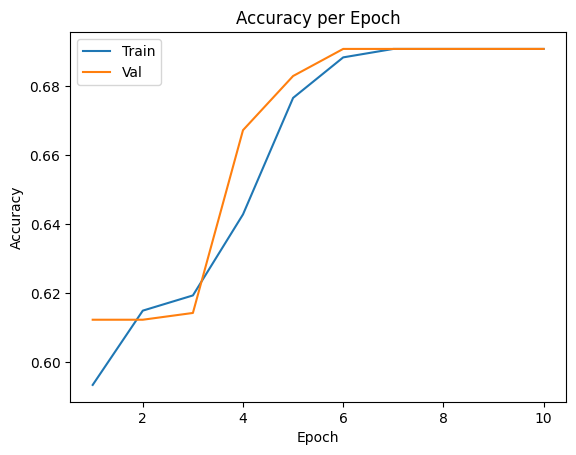

===============Hyperparameter: config_2: {'batch_size': 16, 'device': 'cuda', 'optimizer': 'Adam', 'num_epochs': 20, 'learning_rate': 0.01, 'activation_fn': 'leaky_relu'}===============
self.train_dataset.__len__():511, target_df_shape:(511,)
Epoch 01 | train_loss=0.6461 acc=0.6397 | val_loss=0.5169 acc=0.6893
Epoch 02 | train_loss=0.5105 acc=0.7304 | val_loss=0.4473 acc=0.8252
Epoch 03 | train_loss=0.4939 acc=0.7745 | val_loss=0.4497 acc=0.8058
Epoch 04 | train_loss=0.4770 acc=0.7745 | val_loss=0.4538 acc=0.7670
Epoch 05 | train_loss=0.4858 acc=0.7598 | val_loss=0.4509 acc=0.8058
Epoch 06 | train_loss=0.4822 acc=0.7475 | val_loss=0.4505 acc=0.7476
Epoch 07 | train_loss=0.5108 acc=0.7843 | val_loss=0.4433 acc=0.8252
Epoch 08 | train_loss=0.4709 acc=0.7770 | val_loss=0.4303 acc=0.8252
Epoch 09 | train_loss=0.4825 acc=0.7843 | val_loss=0.4336 acc=0.8058
Epoch 10 | train_loss=0.4641 acc=0.8015 | val_loss=0.4289 acc=0.8155
Epoch 11 | train_loss=0.4660 acc=0.7598 | val_loss=0.4341 acc=0.805

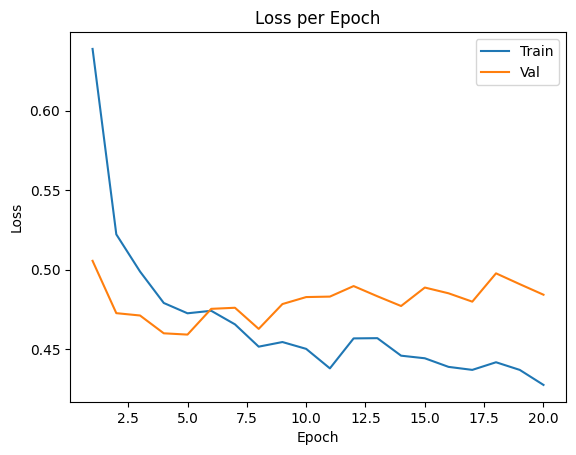

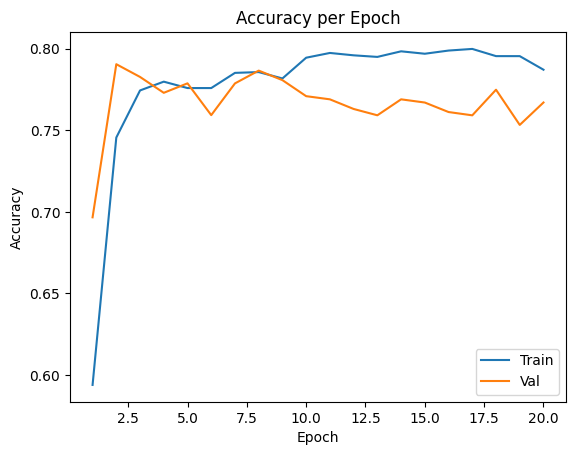

===============Hyperparameter: config_3: {'batch_size': 32, 'device': 'cuda', 'optimizer': 'AdamW', 'num_epochs': 15, 'learning_rate': 0.01, 'activation_fn': 'gelu'}===============
self.train_dataset.__len__():511, target_df_shape:(511,)
Epoch 01 | train_loss=0.6177 acc=0.6422 | val_loss=0.5002 acc=0.6893
Epoch 02 | train_loss=0.5191 acc=0.7500 | val_loss=0.4312 acc=0.8252
Epoch 03 | train_loss=0.4977 acc=0.7794 | val_loss=0.4412 acc=0.8155
Epoch 04 | train_loss=0.4806 acc=0.7647 | val_loss=0.4447 acc=0.8058
Epoch 05 | train_loss=0.4710 acc=0.7917 | val_loss=0.4413 acc=0.7961
Epoch 06 | train_loss=0.4738 acc=0.7941 | val_loss=0.4280 acc=0.8058
Epoch 07 | train_loss=0.4568 acc=0.7819 | val_loss=0.4313 acc=0.8252
Epoch 08 | train_loss=0.4517 acc=0.7966 | val_loss=0.4282 acc=0.8058
Epoch 09 | train_loss=0.4756 acc=0.7892 | val_loss=0.4282 acc=0.8155
Epoch 10 | train_loss=0.4471 acc=0.7941 | val_loss=0.4140 acc=0.8252
Epoch 11 | train_loss=0.4356 acc=0.8064 | val_loss=0.4313 acc=0.8155
Epo

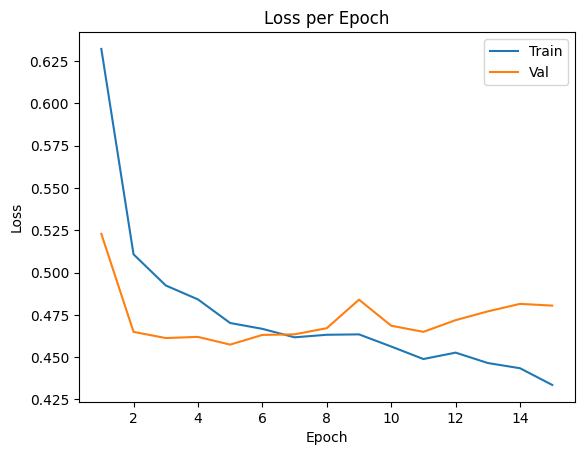

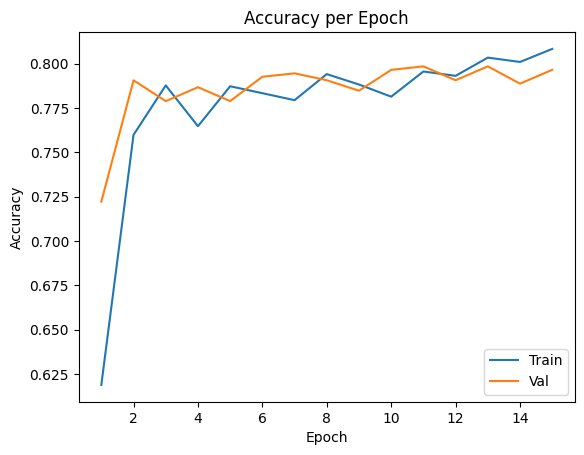

Best Hyper Parameter set: Learning rate: 0.01, Optimizer: AdamW, Batch size:32, Mean validation accuracy:0.8140681515324577, Standard Value accuracy:0.032919561842243074, Mean value loss:0.4583617615854084, Actication function:gelu


In [ ]:
#Experiment 1 Configuration of Hyperparameters:
settings = {
    'config_1' : {
        'batch_size':16,
        'device': 'cuda',
        'optimizer': 'SGD',
        'num_epochs': 10,
        'learning_rate': 0.001,
        'activation_fn': 'relu'
    },
    'config_2' : {
        'batch_size':16,
        'device': 'cuda',
        'optimizer': 'Adam',
        'num_epochs': 20,
        'learning_rate': 0.01,
        'activation_fn': 'leaky_relu'
    },
    'config_3' : {
        'batch_size':32,
        'device': 'cuda',
        'optimizer': 'AdamW',
        'num_epochs': 15,
        'learning_rate': 0.01,
        'activation_fn': 'gelu'
    },
}
for setting, config in settings.items():
    print(f"===============Hyperparameter: {setting}: {config}===============")
    def model_ctor(activation_fn):
        return Model_a2(activation_fn)

    results = []

    model_util = ModelUtility(config, train_dataset, test_dataset)

    val_losses, val_accs, fold_states = model_util.kfold_fit(model_ctor, train_df_scaled['Outcome'], activation_fn=config['activation_fn'])

    results.append({
                    "lr": config['learning_rate'],
                    "optimizer": config['optimizer'],
                    "batch_size": config['batch_size'],
                    "mean_val_acc": float(np.mean(val_accs)),
                    "std_val_acc": float(np.std(val_accs)),
                    "mean_val_loss": float(np.mean(val_losses)),
                    "fold_states": fold_states,
                    "activation_fn": config['activation_fn']
                })

best = max(results, key=lambda r: (r["mean_val_acc"], -r["mean_val_loss"]))
print(f"Best Hyper Parameter set: Learning rate: {best['lr']}, Optimizer: {best['optimizer']}, Batch size:{best['batch_size']}, Mean validation accuracy:{best['mean_val_acc']}, Standard Value accuracy:{best['std_val_acc']}, Mean value loss:{best['mean_val_loss']}, Actication function:{best['activation_fn']}")


In [159]:
#Final Training
config = {
        'batch_size': best['batch_size'],
        'device': 'cuda',
        'optimizer': best['optimizer'],
        'num_epochs': 20,
        'learning_rate': best['lr'],
        'activation_fn': best['activation_fn']
}
final_model_util = ModelUtility(config, train_dataset, test_dataset)


In [160]:
final_model, history = final_model_util.fit(model_ctor(best['activation_fn']))

Epoch 01 | train_loss=0.6123 acc=0.7202
Epoch 02 | train_loss=0.5132 acc=0.7691
Epoch 03 | train_loss=0.4844 acc=0.7769
Epoch 04 | train_loss=0.4855 acc=0.7691
Epoch 05 | train_loss=0.4810 acc=0.7886
Epoch 06 | train_loss=0.4643 acc=0.7828
Epoch 07 | train_loss=0.4550 acc=0.8004
Epoch 08 | train_loss=0.4616 acc=0.7750
Epoch 09 | train_loss=0.4658 acc=0.7632
Epoch 10 | train_loss=0.4818 acc=0.7945
Epoch 11 | train_loss=0.4688 acc=0.7847
Epoch 12 | train_loss=0.4342 acc=0.8023
Epoch 13 | train_loss=0.4701 acc=0.7926
Epoch 14 | train_loss=0.4519 acc=0.7965
Epoch 15 | train_loss=0.4570 acc=0.7847
Epoch 16 | train_loss=0.4397 acc=0.7886
Epoch 17 | train_loss=0.4691 acc=0.7945
Epoch 18 | train_loss=0.4305 acc=0.7886
Epoch 19 | train_loss=0.4468 acc=0.8043
Epoch 20 | train_loss=0.4275 acc=0.8278


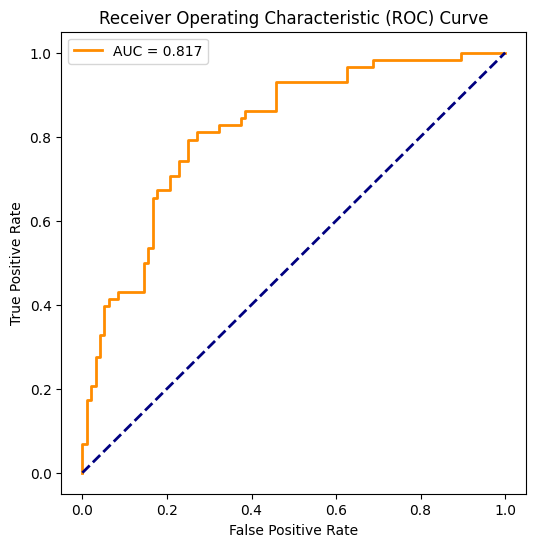

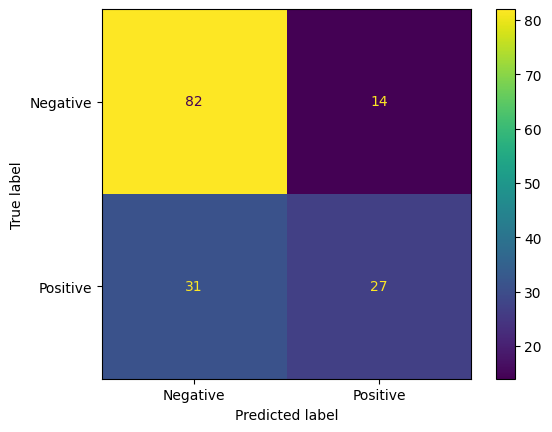

TEST | loss=0.5294 accuracy=0.7078


In [161]:
#Final Tesing
test_loss, test_acc = final_model_util.evaluate(final_model, criterion=nn.CrossEntropyLoss(), test=True)

print(f"TEST | loss={test_loss:.4f} accuracy={test_acc:.4f}")